---
<h1 align='center'><strong>2️⃣Simple topic identification</strong></h1>

---


In [1]:
!git clone https://github.com/mohd-faizy/Natural_Language_Processing_in_Python.git

Cloning into 'Natural_Language_Processing_in_Python'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 152 (delta 16), reused 27 (delta 8), pack-reused 116
Receiving objects: 100% (152/152), 32.91 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# sns.set_theme()

%matplotlib inline

In [3]:
from pprint import pprint

In [4]:
import nltk

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet', quiet=True)

# Download the NLTK averaged perceptron tagger, which is used for part-of-speech tagging.
# nltk.download('averaged_perceptron_tagger', quiet=True)

# Download the NLTK names dataset, which contains a list of common first names and last names.
# nltk.download('names', quit=True)

# Download the NLTK movie_reviews dataset, which contains movie reviews categorized as positive and negative.
# nltk.download('movie_reviews', quit=True)

# Download the NLTK reuters dataset, which is a collection of news documents categorized into topics.
# nltk.download('reuters', quit=True)

# Download the NLTK brown corpus, which is a collection of text from various genres of written American English.
# nltk.download('brown', quit=True)

# Download the 'maxent_ne_chunker' dataset, which is used for Named Entity Recognition.
# nltk.download('maxent_ne_chunker', quiet=True)

# Download the 'words' dataset, which contains a list of common English words.
# nltk.download('words', quiet=True)

True

In [5]:
os.chdir('/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets


In [6]:
ls

 articles.csv            grail.txt            wikipedia_articles/
 english_stopwords.txt   news_articles/      'Wikipedia articles.zip'
 fake_or_real_news.csv  'News articles.zip'


This notebook will demonstrate how to use the `bag-of-words` and `Tf-idf` text representation models from the `NLTK` library, as well as the new `Gensim` library.


## **Word counts with `bag-of-words`**

![bow](https://cdn.analyticsvidhya.com/wp-content/uploads/2023/08/image.png)

**Bag of words (BoW)** is a way of **representing text as a collection of words**, **disregarding the order or structure of the words** in the text. It is a simple and flexible approach to text representation, and it has been used in a wide range of natural language processing (NLP) tasks, such as``document classification`, `sentiment analysis`, and `machine translation`.

To create a bag of words representation for a text, we first need to create a vocabulary of all the unique words in the text. Then, we count the number of times each word appears in the text. This gives us a vector of word counts, which is the bag of words representation for the text.

For example, consider the following text:

>**I love to eat pizza. Pizza is my favorite food.**

The vocabulary for this text is the set of unique words: `{"I", "love", "to", "eat", "pizza", "is", "my", "favorite", "food"}`. The bag of words representation for this text is the vector `[1, 1, 1, 1, 2, 1, 1, 1, 1]`.

This vector tells us that the word pizza appears twice in the text, and all the other words appear once.

- **Bag-of-words**
    - Basic method for finding topics in a text.
    - Need to first create tokens using tokenization and then count up all the tokens.
    - The more frequent a word, the more important it might be.
    - Can be a great way to determine the significant words in a text.

### Bag-of-words picker
It's time for a quick check on your understanding of bag-of-words.

In [7]:
from nltk.tokenize import word_tokenize
from collections import Counter # The Counter class is a subclass of dict
                                # it designed to count the occurrences of elements in a collection.

# Input text
text = "The cat is in the box. The cat box."

# Tokenize the text
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Count the word frequencies
word_freq = Counter(tokens)
print("Word Frequencies:", word_freq)

# Get the most common words with their counts
most_common_words = word_freq.most_common(3)
print("Most Common Words:", most_common_words)

Tokens: ['The', 'cat', 'is', 'in', 'the', 'box', '.', 'The', 'cat', 'box', '.']
Word Frequencies: Counter({'The': 2, 'cat': 2, 'box': 2, '.': 2, 'is': 1, 'in': 1, 'the': 1})
Most Common Words: [('The', 2), ('cat', 2), ('box', 2)]


### Building a Counter with bag-of-words
In this exercise, you'll build your first (in this course) bag-of-words counter using a Wikipedia article, which has been pre-loaded as `article`. Try doing the bag-of-words without looking at the full article text, and guessing what the topic is! If you'd like to peek at the title at the end, we've included it as `article_title`. Note that this article text has had very little preprocessing from the raw Wikipedia database entry.

In [8]:
import re
from nltk.tokenize import word_tokenize
from collections import Counter

path = '/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/articles.csv'

with open(path, 'r') as file:
    article = file.read()
    article_title = word_tokenize(article)[2]

# Tokenize the aricle: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
pprint(bow_simple.most_common(10))

[(',', 85542),
 ("''", 1278),
 ('computer', 402),
 ('software', 375),
 ('``', 345),
 ('cite', 210),
 ('ref', 191),
 (',computer', 187),
 ("'s", 170),
 ('system', 153)]


## **Simple text preprocessing**

Why we Preprocess?

- Helps make for better input data
    - When performing machine learning or other statistical methods
- Examples
    - `Tokenization` to create a bag of words.
    - Applying `Lowercasing` can lead to the better results.
- `Lemmatization` / `Stemming`
    - where we Shorten words to their root stems.
- Removing `stopwords`, `punctuation`, or `unwanted tokens` which don't carry much meaning.

### Text Preprocessing Steps

1. Remove **HTML Tags**
2. **Lowercasing**
3. **Tokenization**
4. Remove **Special Character**s and **Punctuation**
5. **Remove Numbers**
6. Remove **URLs** and **Email Addresses**
7. Handle Contractions
8. Spell Checking and Correction
9. Remove Duplicate Words
10. Remove Short Words
11. Remove **Stop Words**
12. **Part-of-Speech** (POS) Tagging
13. **Named Entity Recognition** (NER)
14. **Stemming** (optional)
15. **Lemmatization**
16. Normalize Whitespace
17. Text Length Filtering (optional)
18. Custom Cleaning (optional)
19. Token Filtering (optional)
20. Vectorization
21. **Bag-of-Words **(BoW) or TF-IDF
22. **Word Embeddings**



> **Note:** Before lemmatizing token through NLTK, you must install `wordnet` package

In [9]:
# Import the necessary libraries
import nltk
from nltk.corpus import stopwords  # Import the NLTK stopwords corpus
from nltk.tokenize import word_tokenize  # Import the NLTK word_tokenize function
from collections import Counter  # Import the Counter class from the collections module

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Define the input text
text = """The cat is in the box.
          The cat likes the box.
          The box is over the cat."""

# Tokenize the text into words, convert them to lowercase, and filter out non-alphabetic tokens
tokens = [words for words in word_tokenize(text.lower()) if words.isalpha()]

# Remove stopwords from the list of tokens
no_stops = [token for token in tokens if token not in stopwords.words('english')]

# Count the frequency of each word in the filtered list of tokens
word_counts = Counter(no_stops)

# Find the two most common words in the text
most_common_words = word_counts.most_common(2)

# Print the result, which includes the most common words and their frequencies
print(most_common_words)

[('cat', 3), ('box', 3)]


In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)
# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)
# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet', quiet=True)


path = '/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/english_stopwords.txt'

with open(path, 'r') as file:
    english_stops = file.read()

display(english_stops[:10], "\n")

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
print(alpha_only[:10], "\n")

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]
print(no_stops[:10], "\n")

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
pprint(bow.most_common(10))

'i\nme\nmy\nmy'

'\n'

['uses', 'use', 'use', 'use', 'multiple', 'computer', 'file', 'debugging', 'dmy', 'dmy'] 

['uses', 'multiple', 'computer', 'file', 'debugging', 'dmy', 'dmy', 'reverse', 'mdy', 'tv'] 

[('computer', 478),
 ('software', 375),
 ('system', 228),
 ('program', 225),
 ('cite', 210),
 ('language', 197),
 ('ref', 191),
 ('code', 153),
 ('programming', 139),
 ('bug', 128)]


## **Introduction to `GenSim`**

- `Gensim` stands for **Generate Similar**.
    - **Gensim** is a **Python library** for NLP.
    - It is used to represent `documents` and `words` as `vectors`.
    - You can use Gensim to do a variety of NLP tasks, such as:
        - `Topic modeling`: Gensim can help you identify the main topics ina collection of documents. This can be useful for tasks such asorganizing documents or generating summaries.
        - `Machine translation`: Gensim can be used to translate text fromone language to another.
        - `Sentiment analysis`: Gensim can be used to determine thesentiment of a piece of text, such as whether it is positive,negative, or neutral.
        
    - Features provide by `Gensim`
        - Provides pre-trained word vector models such as:
            - `FastText`
            - `Word2Vec`
        - Number of Algorithms for **Topic modeling**:
            - *Latent Semantic Analysis* (`LSA`)
            - *Latent Dirichlet Allocation* (`LDA`)
        - `TF-IDF`







In [11]:
import gensim
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sample corpus
corpus = [
    'The movie was about a spaceship and aliens.',
    'I really liked the movie!',
    'Awesome action scenes, but boring characters.',
    'The movie was awful! I hate alien films.',
    'Space is cool! I liked the movie.',
    'More space films, please!.'
]

# Define and remove stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess, convert to lowercase
processed_corpus = []
for sentence in corpus:
    words = word_tokenize(sentence.lower())  # Tokenize and convert to lowercase in one step
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    processed_corpus.append(words)

# Create a dictionary of words with unique IDs
dictionary = Dictionary(processed_corpus)

# Print the token-to-ID mapping of words in the dictionary
print(dictionary.token2id)

# Create a corpus of document representations as bags of words
corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]

# Print the resulting corpus
print(corpus)

{'.': 0, 'aliens': 1, 'movie': 2, 'spaceship': 3, '!': 4, 'liked': 5, 'really': 6, ',': 7, 'action': 8, 'awesome': 9, 'boring': 10, 'characters': 11, 'scenes': 12, 'alien': 13, 'awful': 14, 'films': 15, 'hate': 16, 'cool': 17, 'space': 18, 'please': 19}
[[(0, 1), (1, 1), (2, 1), (3, 1)], [(2, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(0, 1), (2, 1), (4, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(0, 1), (2, 1), (4, 1), (5, 1), (17, 1), (18, 1)], [(0, 1), (4, 1), (7, 1), (15, 1), (18, 1), (19, 1)]]


### **What are word vectors?**

![wrodvec](https://miro.medium.com/v2/resize:fit:2000/1*SYiW1MUZul1NvL1kc1RxwQ.png)

- **What are word vectors and how do they help with NLP?**
    - `Multi-dimensional Numerical` representation of a word.
    - It is a list of `numbers` that capture the meaning of a word in a way that can be **understood by a computer**.
    - Word vectors are created using a variety of methods, but the most common method is to use a `deep learnings` `neural network`.
    - They give us insight into relationships between words in a corpus.
    - These representations capture **`semantic`** and **`syntactic`** relationships between words based on their usage patterns in a given text corpus.

Here's how they work and their importance in NLP:

- **Word Vector Creation:**

    - To create word vectors, algorithms like `Word2Vec`, `GloVe`, `FastText`, or `BERT` are used.
    - These algorithms analyze large amounts of text data to learn word embeddings.
    - Words with similar meanings or contexts will be represented as vectors that are close together in this vector space, while words with different meanings will be farther apart.

- **Semantic and Syntactic Relationships:**

    - Word vectors capture both `semantic` (meaning-related) and `syntactic `(grammar-related) relationships between words.
    - **For example**, in the word vector space, "`king`" might be close to "`queen`" because they share a similar `Semantic`.
    - Word vectors can also encode `Syntactic` relationships, e.g., verb forms like "`run`," "`ran`," and "`running`" positioned close to each other due to verb tense.

- **NLP Applications:**

    - Word vectors are used as features in various NLP tasks: `sentiment analysis`, `text classification`, `machine translation`, `named entity recognition(NER)`.
    - Representing words numerically makes these tasks more manageable for machine learning models.
    - Particularly useful for understanding context in language.

- **Dimensionality Reduction:**

    - Word vectors typically have a fixed dimensionality, e.g., `100`, `300` dimensions, specified during creation.
    - This dimensionality reduction enables the compact and computationally efficient representation of words.

- **Transfer Learning:**

    - `Pre-trained` word embeddings can be fine-tuned for specific NLP tasks.
    - Models trained on large text corpora can leverage pre-trained embeddings like Word2Vec or GloVe for transfer learning.

- **Improved Performance:**

    - Using word vectors often **`enhances NLP model performance`** compared to traditional **`bag-of-words`** representations.
    - They capture more nuanced semantic and syntactic information.








### **Creating and querying a corpus with `GenSim`**

**Getting Started:**

- import messy articles data from **Wikipedia**.
- Preprocessed them by:
    -  `lowercasing` all words
    - `tokenizing` them,
    -  and removing `stopwords` and `punctuation`.
    - then stored in a list of document tokens called `articles`.
    - and then generate the `gensim` **dictionary** and **corpus**.



### **Gensim bag-of-words**

Now, we'll use your new **gensim** `corpus` and `dictionary` to see the most common terms per document and across all documents. we your dictionary to look up the terms.



**Glob Module:**

>it is used for searching files and directories on your computer using wildcard patterns. It's a convenient way to find and work with files that match specific criteria, such as files with certain extensions or names.

```python
# Find all .txt files in the current directory
txt_files = glob.glob("*.txt")

# Find all Python script files in a subdirectory named 'scripts'
python_scripts = glob.glob("scripts/*.py")
```

Here's a simple example that prints all the `.txt` files in the directory.

```python
import glob

txt_files = glob.glob("*.txt")

for file in txt_files:
    print(file)
```

In [12]:
import glob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary

# Define the path to the directory containing the text files
path = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/wikipedia_articles/*.txt"

# Get a list of file paths in the directory
path_list = glob.glob(path)

# Initialize NLTK stopwords
stopwords_en = set(stopwords.words("english"))

# Function to tokenize text, convert to lowercase, and filter out non-alphabetic words and stopwords
def preprocess_text(text):
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
    cleaned_tokens = [t for t in lower_tokens if t.isalpha() and t not in stopwords_en]
    return cleaned_tokens

articles = []
for article_path in path_list:
    with open(article_path, 'r') as file:
        article_text = file.read()


    preprocessed_article = preprocess_text(article_text)
    articles.append(preprocessed_article)

print("Total number of wiki articles: ", len(articles))

# Create a Dictionary from the articles
dictionary = Dictionary(articles)
print(dictionary)

# Obtain the id for "aborting" using dictionary's token2id and get() methods
word_id = dictionary.token2id.get("aborting")
print(f"word_id : {word_id} , word : {dictionary.get(word_id)}")


# Use a list comprehension to create a gensim MmCorpus from dictionary
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
word_freq_pairs = corpus[4][:10]
print(word_freq_pairs)

# Create a list of (word, frequency) pairs
word_freq_list = [(dictionary.get(word_id), frequency) for word_id, frequency in word_freq_pairs]
print(word_freq_list)

Total number of wiki articles:  12
Dictionary<6211 unique tokens: ['aberdeen', 'able', 'aboard', 'absence', 'academic']...>
word_id : 1382 , word : aborting
[(1, 1), (7, 5), (16, 1), (18, 2), (19, 2), (20, 1), (22, 1), (32, 1), (33, 1), (35, 1)]
[('able', 1), ('access', 5), ('active', 1), ('activity', 2), ('actual', 2), ('actually', 1), ('admiral', 1), ('aid', 1), ('aids', 1), ('air', 1)]


>The comment "`Use a list comprehension to create a gensim MmCorpus from dictionary`" means that the code is using a list comprehension to transform the preprocessed text data (in the form of a list of documents) into a format that Gensim, a natural language processing library, can work with. Specifically, it's converting the text data into a Gensim's "`MmCorpus`" format, which is a memory-mapped corpus representation suitable for various NLP tasks like topic modeling.

> `doc2bow` is a method used to convert a document into the bag-of-words.

### `defaultidict`

**Difference between `Counter` and `defaultdict`**


- `Counter` is used for straightforward counting of all elements in an iterable, and it automatically sets missing elements to `0`.

- `defaultdict` is used when you need to customize default values for specific keys in a dictionary-like object and handle missing keys without errors.
 - Having a default value (`0`) for a letter that's not in the word is like having a safety net. It helps you avoid a mistake called a `KeyError`.
 - It's useful because it means you don't have to check if a letter is in the word before you count it.
 - You can just count it, and if it's not there, you'll get `0` instead of an error.


In [13]:
from collections import Counter

# Example: Counting word frequencies in a text document
text = "This is a simple example of counting word frequencies in NLP. This example is simple."
word_freq = Counter(text.split())

print(word_freq)

Counter({'This': 2, 'is': 2, 'example': 2, 'a': 1, 'simple': 1, 'of': 1, 'counting': 1, 'word': 1, 'frequencies': 1, 'in': 1, 'NLP.': 1, 'simple.': 1})


In [14]:
from collections import defaultdict

# Example: Counting word frequencies in a text document
text = "This is a simple example of counting word frequencies in NLP. This example is simple."

word_freq = defaultdict(int)  # Default value is 0 for int

words = text.split()

for word in words:
    word_freq[word] += 1

print(word_freq)

defaultdict(<class 'int'>, {'This': 2, 'is': 2, 'a': 1, 'simple': 1, 'example': 2, 'of': 1, 'counting': 1, 'word': 1, 'frequencies': 1, 'in': 1, 'NLP.': 1, 'simple.': 1})


 It's designed to create dictionaries with default values for keys that don't exist. You specify the default value when creating the defaultdict, and this value is returned if you try to access a non-existent key.

In [15]:
# Initialize a string variable
word = "Programming"

# Initialize an empty dictionary 'd' to store character frequencies
d = {}

# Iterate through each character in the 'word' string
for c in word:          # Check if the character 'c' is not in the dictionary 'd'
    if c not in d:
        d[c] = 1        # If 'c' is not in 'd', add it to the dictionary with a value of 1
    else:
        d[c] += 1       # If 'c' is already in 'd', increment its value by 1 to count its frequency

# Print the final dictionary 'd' containing character frequencies
print(d)

{'P': 1, 'r': 2, 'o': 1, 'g': 2, 'a': 1, 'm': 2, 'i': 1, 'n': 1}


- We can eliminate the need for checking the `if-else` condition when adding `keys` to our dictionary if we have prior knowledge of the default value for any newly introduced `key`. This is precisely where the `defaultdict` comes into play.

- With a `defaultdict`, we can predefine a default value type for keys that do not exist in the dictionary. This means that whenever we access a `non-existent` key, the `defaultdict` automatically provides it with the specified **default value**, sparing us from the manual condition checking and value initialization typically seen in regular dictionaries.


**why and when to use `defaultdict`?**
>it allows us to set a default value type for keys that are not yet present. By doing so, we eliminate the need to explicitly check for the existence of keys and manually initialize their values, making our code more efficient and easier to understand.

In [16]:
from collections import defaultdict

d = defaultdict(int) # any new key introduced in our dict
                     # will have the defalut value equal to 0 in case of interger

for c in word:
    d[c] += 1

print(d)
print(d['z']) # key that not present will have the defaullt vlaue eqaul to zero

defaultdict(<class 'int'>, {'P': 1, 'r': 2, 'o': 1, 'g': 2, 'a': 1, 'm': 2, 'i': 1, 'n': 1})
0


## **`Tf-idf` with gensim**
- TF-IDF
    - Term Frequency - Inverse Document Frequency
    - Allows you to determine the most important words in each document
    - Each corpus may have shared words beyond just stop words
    - These words should be down-weighted in importance
    - Ensures most common words don't show up as key words
    - Keeps document specific frequent words wieghted high
- Formula

$$ w_{i, j} = \text{tf}_{i, j} * \log (\frac{N}{\text{df}_i}) $$
- $ w_{i, j}=$ tf-idf for token $i$ in document $j$
- $ \text{tf}_{i, j} =$ number of occurences of token $i$ in document $j$
- $ \text{df}_{i} =$ number of documents that contain token $i$
- $ N =$ total number of documents

### **What is tf-idf?**

Calculate the `tf-idf` weight for the word `"computer"`, which appears **`5` times** in a document containing `100` words. Given a corpus containing `200` documents, with `20` documents mentioning the word `"computer"`, `tf-idf` can be calculated by multiplying **Term Frequency** with **Inverse Document Frequency**.

- **Term frequency** = Percentage share of the word compared to all tokens in the document.
- **Inverse document frequency** = `logarithm` of the total number of documents in a corpora divided by the number of documents containing the term.

$$
\text{TF} = \frac{5}{100} = 0.05
$$

$$
\text{IDF} = \log\left(\frac{200}{20}\right) = \log(10) = 1
$$

$$
\text{TF-IDF} = \text{TF} \cdot \text{IDF} = 0.05 \cdot 1 = 0.05
$$


### **TF-idf using Gensim**

In [17]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora import Dictionary
from pprint import pprint

text = """
       Natural Language Processing (NLP) is a field of artificial intelligence that focuses
       on the interaction between computers and humans through natural language. The ultimate
       goal of NLP is to enable computers to understand, interpret, and generate human language
       in a way that is both meaningful and useful. NLP techniques are used in a wide range of
       applications, including machine translation, speech recognition, sentiment analysis,
       chatbots, and information retrieval. It involves various tasks such as tokenization,
       part-of-speech tagging, named entity recognition, and syntactic parsing. NLTK is a popular
       Python library for NLP, providing tools and resources for tasks like text processing, text
       classification, and language modeling. It offers a wide range of functions and datasets
       to help you get started with NLP projects. In this sample text, we'll demonstrate some
       basic NLP tasks using NLTK, such as tokenization and part-of-speech tagging.
       Let's get started!
      """

# Tokenize the text
sentences = nltk.sent_tokenize(text)

# Tokenize and preprocess the sentences
corpus = []
wordnet = WordNetLemmatizer()

for i in range(len(sentences)):
    cleaned_sentence = re.sub('[^a-zA-Z]', ' ', sentences[i])
    cleaned_sentence = cleaned_sentence.lower()
    cleaned_sentence = cleaned_sentence.split()
    cleaned_sentence = [wordnet.lemmatize(word) for word in cleaned_sentence if not word in set(stopwords.words('english'))]
    corpus.append(cleaned_sentence)

# Create a Gensim Dictionary
dictionary = Dictionary(corpus)

# Store the BoW representation in a variable
bow_corpus = [dictionary.doc2bow(sentence) for sentence in corpus]

# Create a Gensim TF-IDF model
tfidf = TfidfModel(bow_corpus)

# Transform the corpus to TF-IDF representation using the stored BoW
tfidf_corpus = tfidf[bow_corpus]

# Extract feature names (words) from the dictionary
feature_names = [dictionary[id] for id in range(len(dictionary))]

# Create a DataFrame to display the TF-IDF matrix
tfidf_matrix = []

for doc in tfidf_corpus:
    tfidf_values = {dictionary[id]: freq for id, freq in doc}
    row = [tfidf_values.get(word, 0.0) for word in feature_names]
    tfidf_matrix.append(row)

# Displaying the TF-IDF matrix using a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix, columns=feature_names)
display(tfidf_df)

,artificial,computer,field,focus,human,intelligence,interaction,language,natural,nlp,...,get,help,offer,project,started,basic,demonstrate,sample,using,let
0,0.298243,0.198829,0.298243,0.298243,0.198829,0.298243,0.298243,0.281350,0.596486,0.041261,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.209456,0.000000,0.000000,0.209456,0.000000,0.000000,0.148194,0.000000,0.043466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039013,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135426,0.000000,0.039721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053065,...,0.255713,0.383569,0.383569,0.383569,0.255713,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.386729,0.386729,0.386729,0.386729,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485071,0.000000,0.000000,0.000000,0.485071,0.000000,0.000000,0.000000,0.000000,0.727607


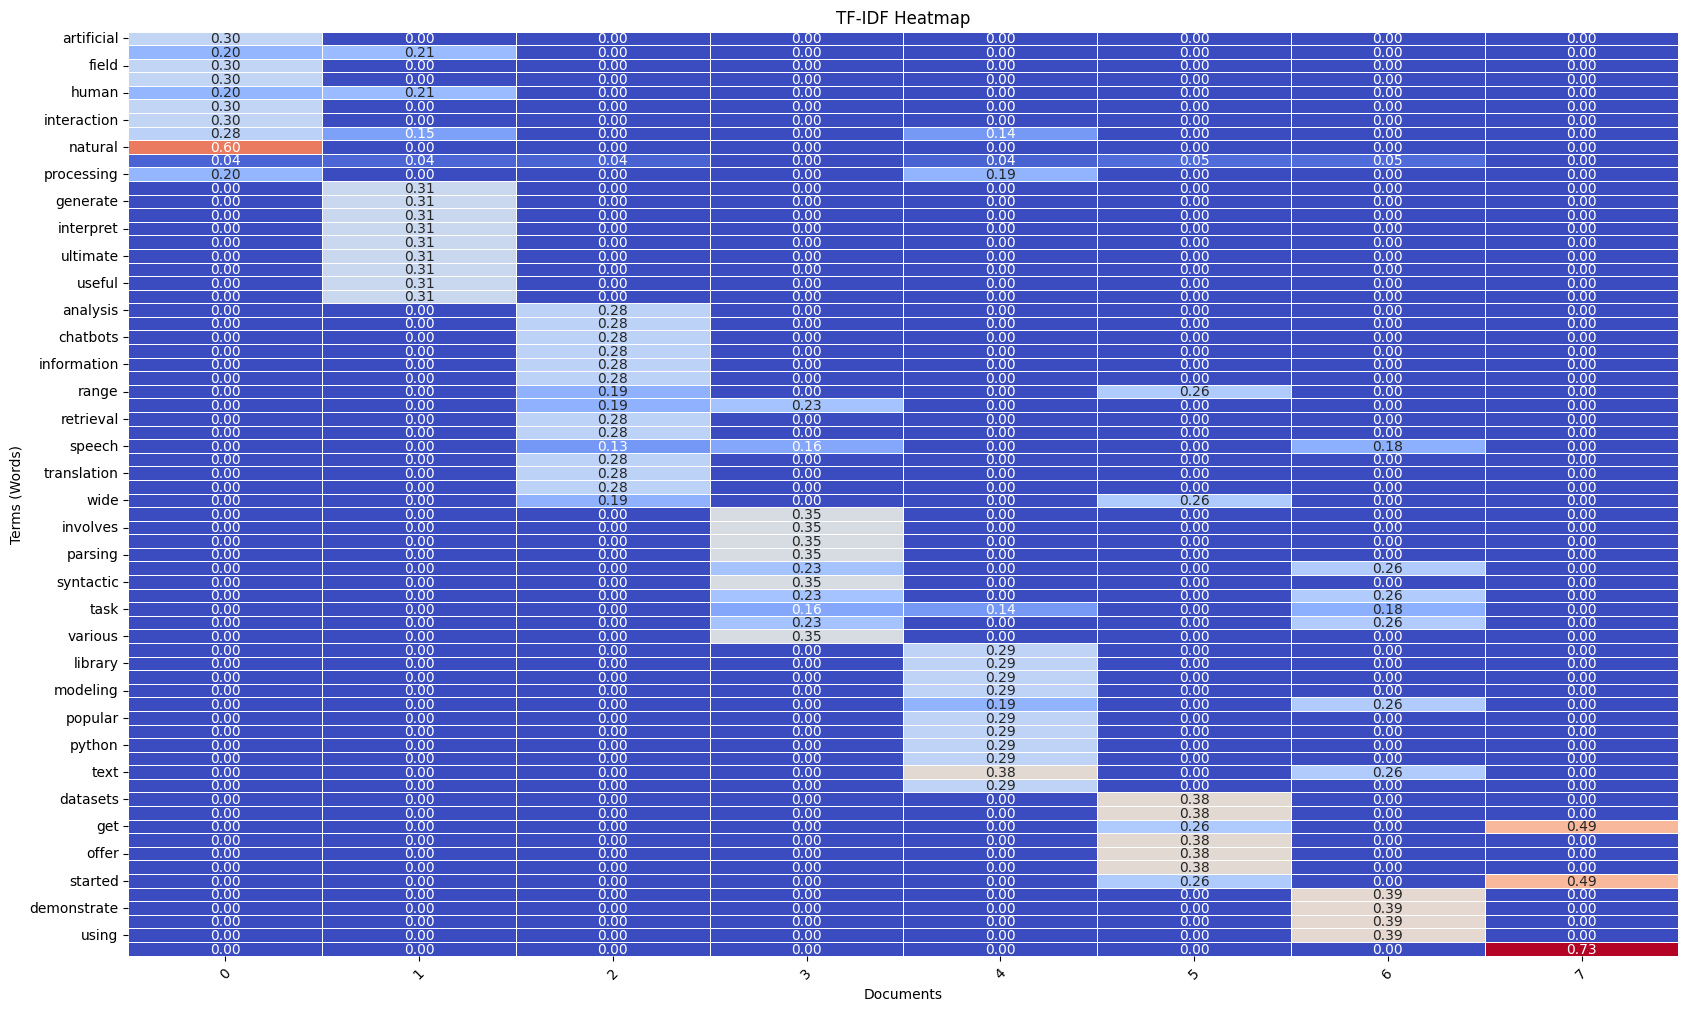

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your TF-IDF matrix stored in tfidf_df
# Make sure tfidf_df is already defined as in your code

# Transpose the TF-IDF matrix for the desired format
tfidf_df = tfidf_df.transpose()

# Plotting the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(tfidf_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=False, linewidths=0.5)
plt.title('TF-IDF Heatmap')
plt.xlabel('Documents')
plt.ylabel('Terms (Words)')
plt.xticks(rotation=45)
plt.show()

### **`TfidfModel` from `Gensim` vs `TfidfVectorizer` from `sklearn`**


**Input Data:**

- **Gensim's** `TfidfModel`: Takes a bag-of-words corpus as input.
- **sklearn's** `TfidfVectorizer`: Takes raw documents as input.

**Normalization:**

- Both use raw counts as term frequency (TF) and apply `L2` normalization.
- sklearn's TfidfVectorizer allows custom normalization ('`L1`', '`L2`', or 'none').

**Workflow:**

- **Gensim's** `TfidfModel`: Requires creating a dictionary, converting to bag-of-words, and applying the model.
- **sklearn's** `TfidfVectorizer`: Combines these steps in a single model (CountVectorizer + TfidfTransformer).

**Output:**

- **Gensim's** `TfidfModel`:: Outputs a gensim-format corpus (list of lists with word indices and TF-IDF values).
- **sklearn's** `TfidfVectorizer`: Outputs a sparse matrix with TF-IDF values for words in documents.

**Summary:**

- Both libraries compute TF-IDF, differing in workflows, input, and output formats.
- Choose based on specific needs and preferences.



### **TF-idf using Sklearn**

In [19]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

text = """
       Natural Language Processing (NLP) is a field of artificial intelligence that focuses
       on the interaction between computers and humans through natural language. The ultimate
       goal of NLP is to enable computers to understand, interpret, and generate human language
       in a way that is both meaningful and useful. NLP techniques are used in a wide range of
       applications, including machine translation, speech recognition, sentiment analysis,
       chatbots, and information retrieval. It involves various tasks such as tokenization,
       part-of-speech tagging, named entity recognition, and syntactic parsing. NLTK is a popular
       Python library for NLP, providing tools and resources for tasks like text processing, text
       classification, and language modeling. It offers a wide range of functions and datasets
       to help you get started with NLP projects. In this sample text, we'll demonstrate some
       basic NLP tasks using NLTK, such as tokenization and part-of-speech tagging.
       Let's get started!
      """

ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(text)

corpus = []

for i in range(len(sentences)):
    cleaned_sentence = re.sub('[^a-zA-Z]', ' ', sentences[i]) # Removes all characters from sentences[i] that are not alphabetic characters and replaces them with spaces.
    cleaned_sentence = cleaned_sentence.lower()
    cleaned_sentence = cleaned_sentence.split()
    cleaned_sentence = [wordnet.lemmatize(word) for word in cleaned_sentence if not word in set(stopwords.words('english'))]
    cleaned_sentence = ' '.join(cleaned_sentence)
    corpus.append(cleaned_sentence)

print(corpus)
print("\n")

# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_df = tfidf_vectorizer.fit_transform(corpus).toarray()

# Get the feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names (words) from the vectorizer:", feature_names, "\n")

# Printing the TF-IDF matrix
import pandas as pd

# Creating a DataFrame to display the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_df, columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the TF-IDF matrix
print(tfidf_df)

['natural language processing nlp field artificial intelligence focus interaction computer human natural language', 'ultimate goal nlp enable computer understand interpret generate human language way meaningful useful', 'nlp technique used wide range application including machine translation speech recognition sentiment analysis chatbots information retrieval', 'involves various task tokenization part speech tagging named entity recognition syntactic parsing', 'nltk popular python library nlp providing tool resource task like text processing text classification language modeling', 'offer wide range function datasets help get started nlp project', 'sample text demonstrate basic nlp task using nltk tokenization part speech tagging', 'let get started']


Feature names (words) from the vectorizer: ['analysis' 'application' 'artificial' 'basic' 'chatbots' 'classification'
 'computer' 'datasets' 'demonstrate' 'enable' 'entity' 'field' 'focus'
 'function' 'generate' 'get' 'goal' 'help' 'human

**heatmap**

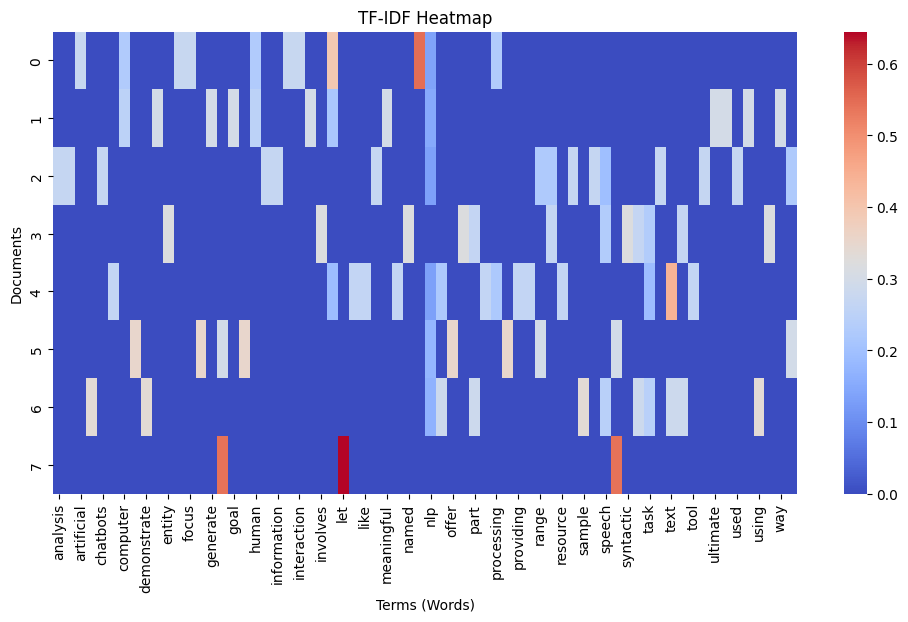

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your TF-IDF matrix stored in tfidf_df
# Make sure tfidf_df is already defined as in your code

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df, cmap='coolwarm')
plt.title('TF-IDF Heatmap')
plt.xlabel('Terms (Words)')
plt.ylabel('Documents')
plt.show()

---
#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
